rays aperture 0.0
rays aperture 3.061778
rays aperture 0.2942257
rays aperture 2.1622066
rays aperture 0.0


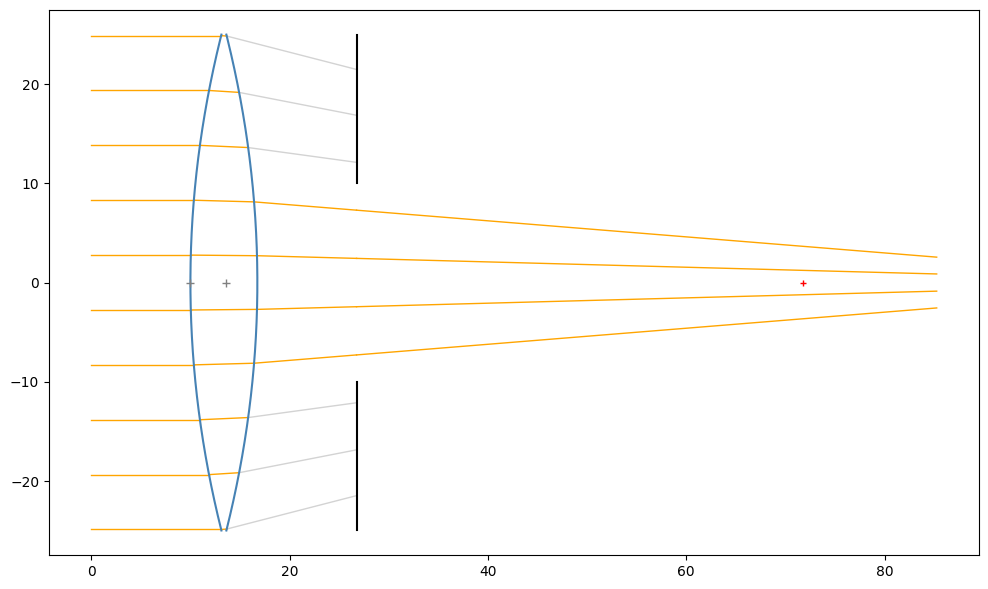

[  0/100] L=  7.389 | grad norm= 3875.240478515625
[  5/100] L=  1.334 | grad norm= 2708.009033203125
[ 10/100] L=  0.002 | grad norm= 28.215349197387695
[ 15/100] L=  0.508 | grad norm= 1026.8638916015625


[ 20/100] L=  0.134 | grad norm= 525.288330078125
[ 25/100] L=  0.068 | grad norm= 373.3957824707031
[ 30/100] L=  0.114 | grad norm= 482.86578369140625
[ 35/100] L=  0.002 | grad norm= 47.430938720703125


[ 40/100] L=  0.048 | grad norm= 311.3485412597656
[ 45/100] L=  0.002 | grad norm= 49.61136245727539
[ 50/100] L=  0.017 | grad norm= 179.76145935058594
[ 55/100] L=  0.003 | grad norm= 54.66434097290039


[ 60/100] L=  0.006 | grad norm= 104.3764877319336
[ 65/100] L=  0.002 | grad norm= 35.90354919433594
[ 70/100] L=  0.003 | grad norm= 63.59592056274414
[ 75/100] L=  0.001 | grad norm= 17.1412353515625


[ 80/100] L=  0.002 | grad norm= 40.10214614868164
[ 85/100] L=  0.001 | grad norm= 3.891174793243408
[ 90/100] L=  0.001 | grad norm= 24.740509033203125
[ 95/100] L=  0.001 | grad norm= 3.6112189292907715


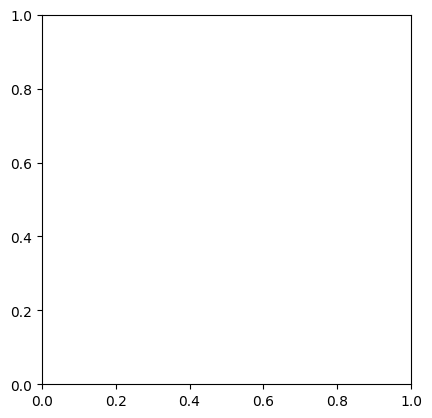

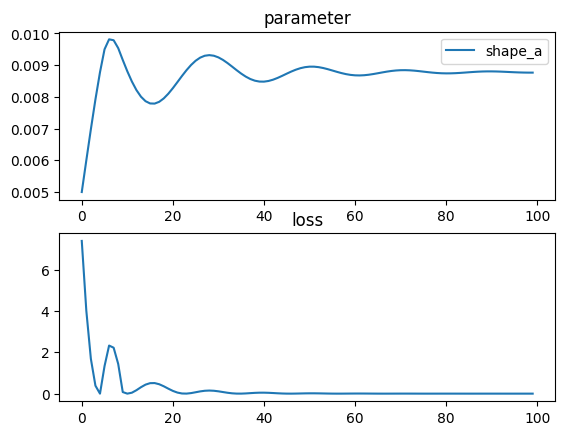

rays aperture 0.0
rays aperture 5.435154
rays aperture 1.3014774
rays aperture 3.9873962
rays aperture 0.0


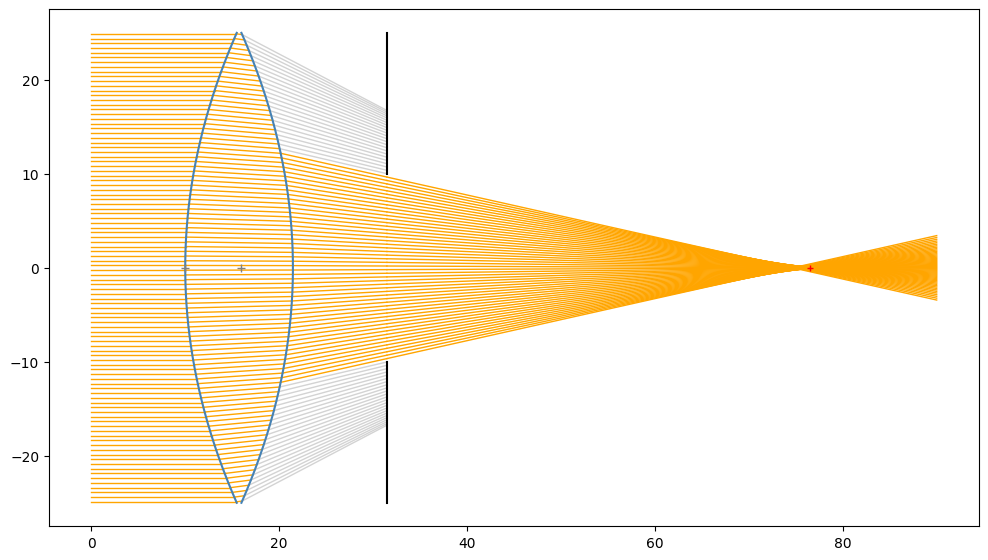

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim

import torchlensmaker as tlm


class Optics(tlm.Module):
    def __init__(self):
        super().__init__()
        self.shape = tlm.Parabola(height=50., a=nn.Parameter(torch.tensor(0.005)))

        self.lens = tlm.SymmetricLens(self.shape, (1.0, 1.49), outer_thickness=0.5)

        self.optics = tlm.OpticalSequence(
            tlm.PointSourceAtInfinity(beam_diameter=50),
            tlm.Gap(10.),
            
            self.lens,

            tlm.Gap(10.0),
            tlm.Aperture(height=50, diameter=20),
            
            tlm.Gap(45.0),
            tlm.FocalPoint(),
        )

    def forward(self, inputs, sampling):
        return self.optics(inputs, sampling)

optics = Optics()

tlm.render_plt(optics)

tlm.optimize(
    optics,
    optimizer = optim.Adam(optics.parameters(), lr=1e-3),
    sampling = {"rays": 10},
    num_iter = 100
)

tlm.render_plt(optics, sampling={"rays": 100})